In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def distance_matrix(df, metric='euclidean'):
    """
    Обчислює матрицю відстаней для цього DataFrame.

    Параметри:
    - df: pandas DataFrame
      Вхідні дані.
    - metric: str, опціонально (за замовчуванням 'euclidean')
      Метрика відстані, яку ви хочете використовувати.

    Повертає:
    - pandas DataFrame
      Матриця відстаней.
    """
    numeric_columns = df.select_dtypes(include='number')

    # Обчислити матрицю відстаней
    distance_matrix = pairwise_distances(numeric_columns, metric=metric)

    # Створити DataFrame з результатами
    result_df = pd.DataFrame(distance_matrix, index=numeric_columns.index, columns=numeric_columns.index)

    return result_df

In [3]:
cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop('target', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=cancer_data.feature_names)
data_scaled['target'] = df['target']

In [7]:
# sns.pairplot(data_scaled, hue='target', diag_kind='kde', plot_kws={'alpha': 0.5})
# plt.show()

In [8]:
data_scaled.sort_values('target', inplace=True)

In [9]:
data_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
190,0.026330,0.891349,0.098896,-0.127954,0.792763,2.595576,1.372267,0.445226,2.089732,1.789355,...,1.873156,-0.025652,-0.207756,0.917547,4.315794,2.766307,0.953090,3.664668,3.361201,0
193,-0.507616,1.761672,-0.445638,-0.504797,0.500985,0.586719,0.247342,-0.085098,0.479666,0.931705,...,2.224898,-0.165645,-0.196329,2.022211,1.376193,0.817074,0.476498,0.508378,2.025680,0
194,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,...,0.342424,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804,0
196,-0.101476,0.698202,-0.055155,-0.187680,1.682331,0.423736,0.623991,0.421496,0.081713,0.846648,...,1.356941,0.129234,-0.129529,1.811799,0.368547,0.521546,0.802347,0.289978,0.520032,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.970559,0.256059,-0.925504,-0.881641,0.842579,0.465430,-0.054229,-0.522306,-0.524343,0.825384,...,-0.076084,-0.915951,-0.826541,0.049596,0.004675,-0.090138,-0.435575,-0.478468,0.169804,1
268,-0.357089,-0.716655,-0.394974,-0.405822,-0.150179,-0.798824,-0.625229,-0.845247,0.724279,-0.724057,...,-0.331749,-0.535883,-0.497635,-0.296707,-0.467340,-0.350164,-0.864965,1.137695,-0.738461,1
267,-0.152598,0.593484,-0.198085,-0.267030,-1.195599,-0.412213,-0.603634,-0.709312,-0.644825,-0.596472,...,0.710451,-0.285980,-0.385129,-1.396988,-0.516959,-0.608750,-0.802689,-0.735695,-0.759519,1
281,-0.678025,-1.226283,-0.730262,-0.647287,-1.297366,-1.154922,-0.833014,-0.549132,1.056515,-0.236401,...,-1.207849,-0.672005,-0.609790,-1.261097,-1.076762,-0.982717,-0.482778,0.323951,-0.945716,1


In [10]:
df = pd.concat([data_scaled.tail(5), data_scaled.head(5)])

In [11]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
269,-0.970559,0.256059,-0.925504,-0.881641,0.842579,0.465430,-0.054229,-0.522306,-0.524343,0.825384,...,-0.076084,-0.915951,-0.826541,0.049596,0.004675,-0.090138,-0.435575,-0.478468,0.169804,1
268,-0.357089,-0.716655,-0.394974,-0.405822,-0.150179,-0.798824,-0.625229,-0.845247,0.724279,-0.724057,...,-0.331749,-0.535883,-0.497635,-0.296707,-0.467340,-0.350164,-0.864965,1.137695,-0.738461,1
267,-0.152598,0.593484,-0.198085,-0.267030,-1.195599,-0.412213,-0.603634,-0.709312,-0.644825,-0.596472,...,0.710451,-0.285980,-0.385129,-1.396988,-0.516959,-0.608750,-0.802689,-0.735695,-0.759519,1
281,-0.678025,-1.226283,-0.730262,-0.647287,-1.297366,-1.154922,-0.833014,-0.549132,1.056515,-0.236401,...,-1.207849,-0.672005,-0.609790,-1.261097,-1.076762,-0.982717,-0.482778,0.323951,-0.945716,1
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,1
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
190,0.026330,0.891349,0.098896,-0.127954,0.792763,2.595576,1.372267,0.445226,2.089732,1.789355,...,1.873156,-0.025652,-0.207756,0.917547,4.315794,2.766307,0.953090,3.664668,3.361201,0
193,-0.507616,1.761672,-0.445638,-0.504797,0.500985,0.586719,0.247342,-0.085098,0.479666,0.931705,...,2.224898,-0.165645,-0.196329,2.022211,1.376193,0.817074,0.476498,0.508378,2.025680,0
194,0.208100,0.912292,0.347273,0.046959,0.572150,1.774977,1.015706,1.028170,-0.272428,0.556040,...,0.342424,0.337735,-0.168554,-0.033692,1.339296,0.895753,0.884571,0.160555,0.169804,0
196,-0.101476,0.698202,-0.055155,-0.187680,1.682331,0.423736,0.623991,0.421496,0.081713,0.846648,...,1.356941,0.129234,-0.129529,1.811799,0.368547,0.521546,0.802347,0.289978,0.520032,0


In [12]:
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'manhattan']
distance_matrices = {}

for metric in metrics:
    dist_matrix = distance_matrix(df.drop('target', axis=1), metric=metric)
    distance_matrices[metric] = dist_matrix

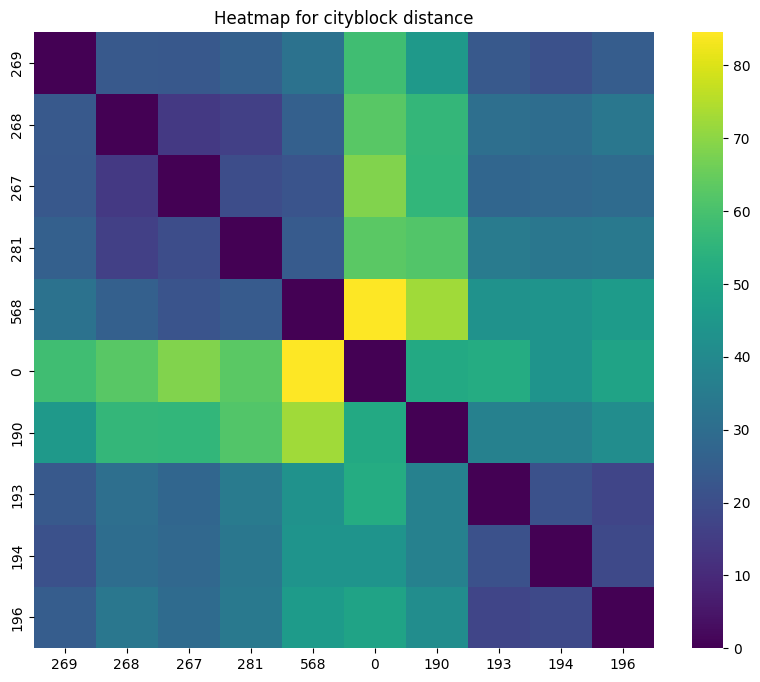

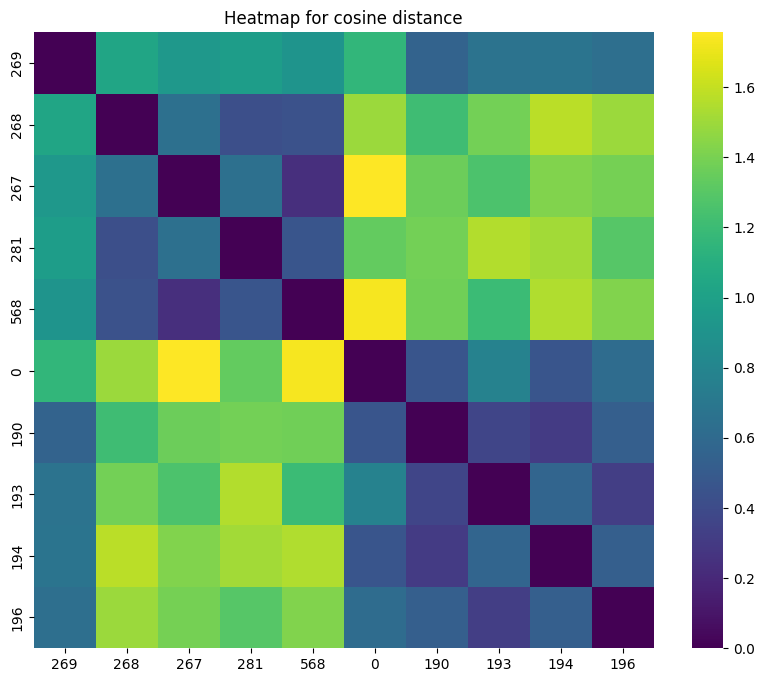

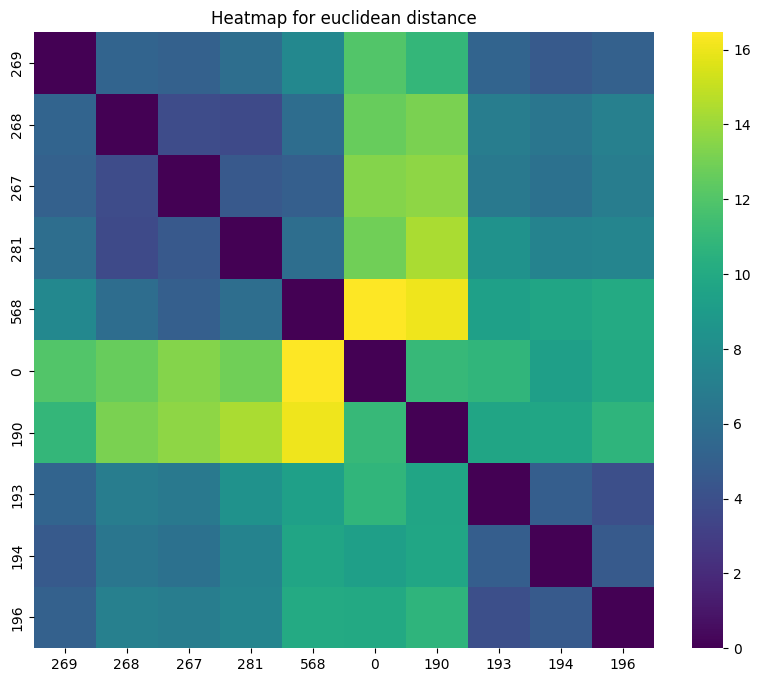

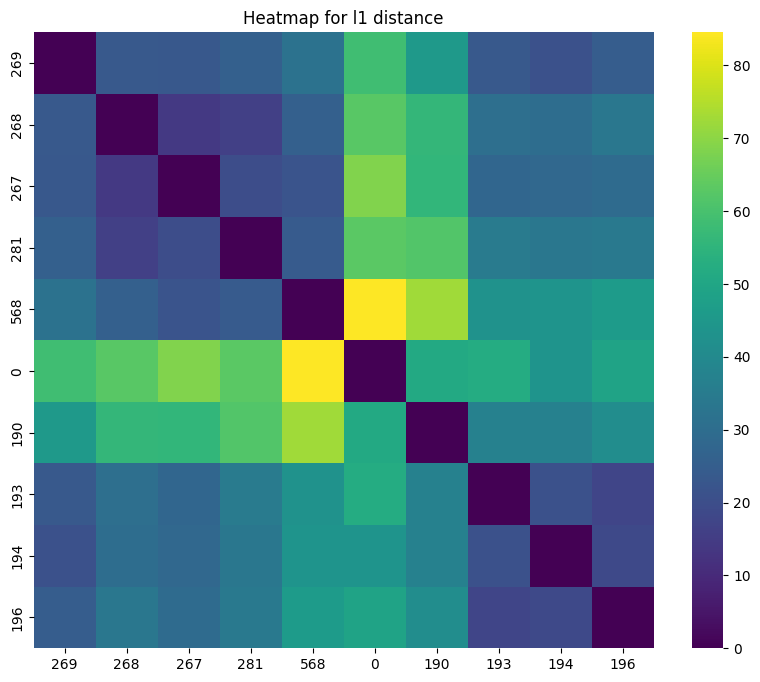

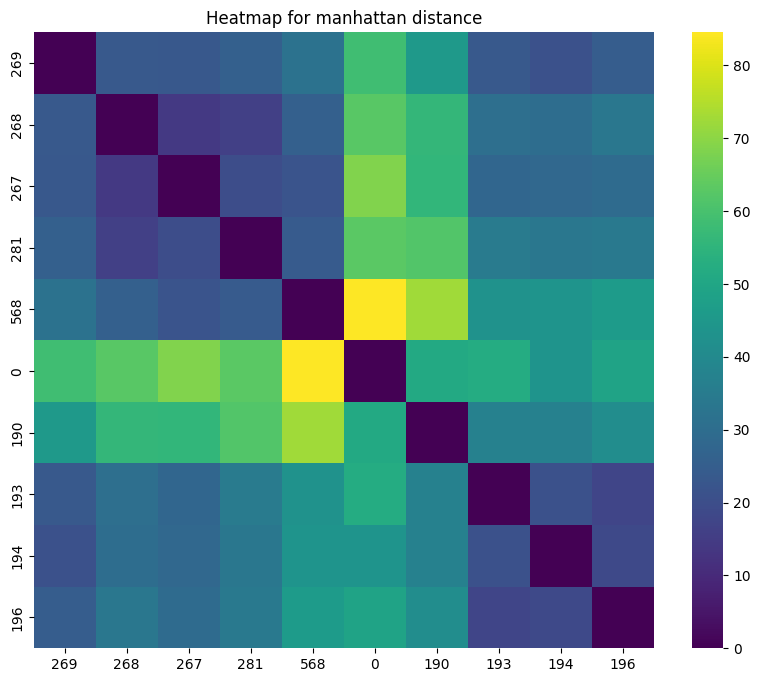

In [13]:
for metric, dist_matrix in distance_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_matrix, cmap='viridis')
    plt.title(f"Heatmap for {metric} distance")
    plt.show()

In [17]:
df.loc[0]['target']

np.float64(0.0)

In [30]:
df.loc[193]['target']

np.float64(0.0)

In [19]:
df.loc[269]['target']

np.float64(1.0)

In [28]:
df.loc[568]['target']

np.float64(1.0)

In [29]:
df.loc[281]['target']

np.float64(1.0)

В даному випадку за cosine distance виразніше за все проглядаєтся більша відстань між значеннями з різною цільовою змінною